In [308]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn import svm

## ANN Libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [208]:
# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


In [209]:
## allow all columns in view
pd.set_option('display.width', 1200)
pd.set_option('display.max_columns', None)

In [249]:
## load my dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [330]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT'], dtype='object')

In [212]:
## getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [213]:
## checking for missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [214]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


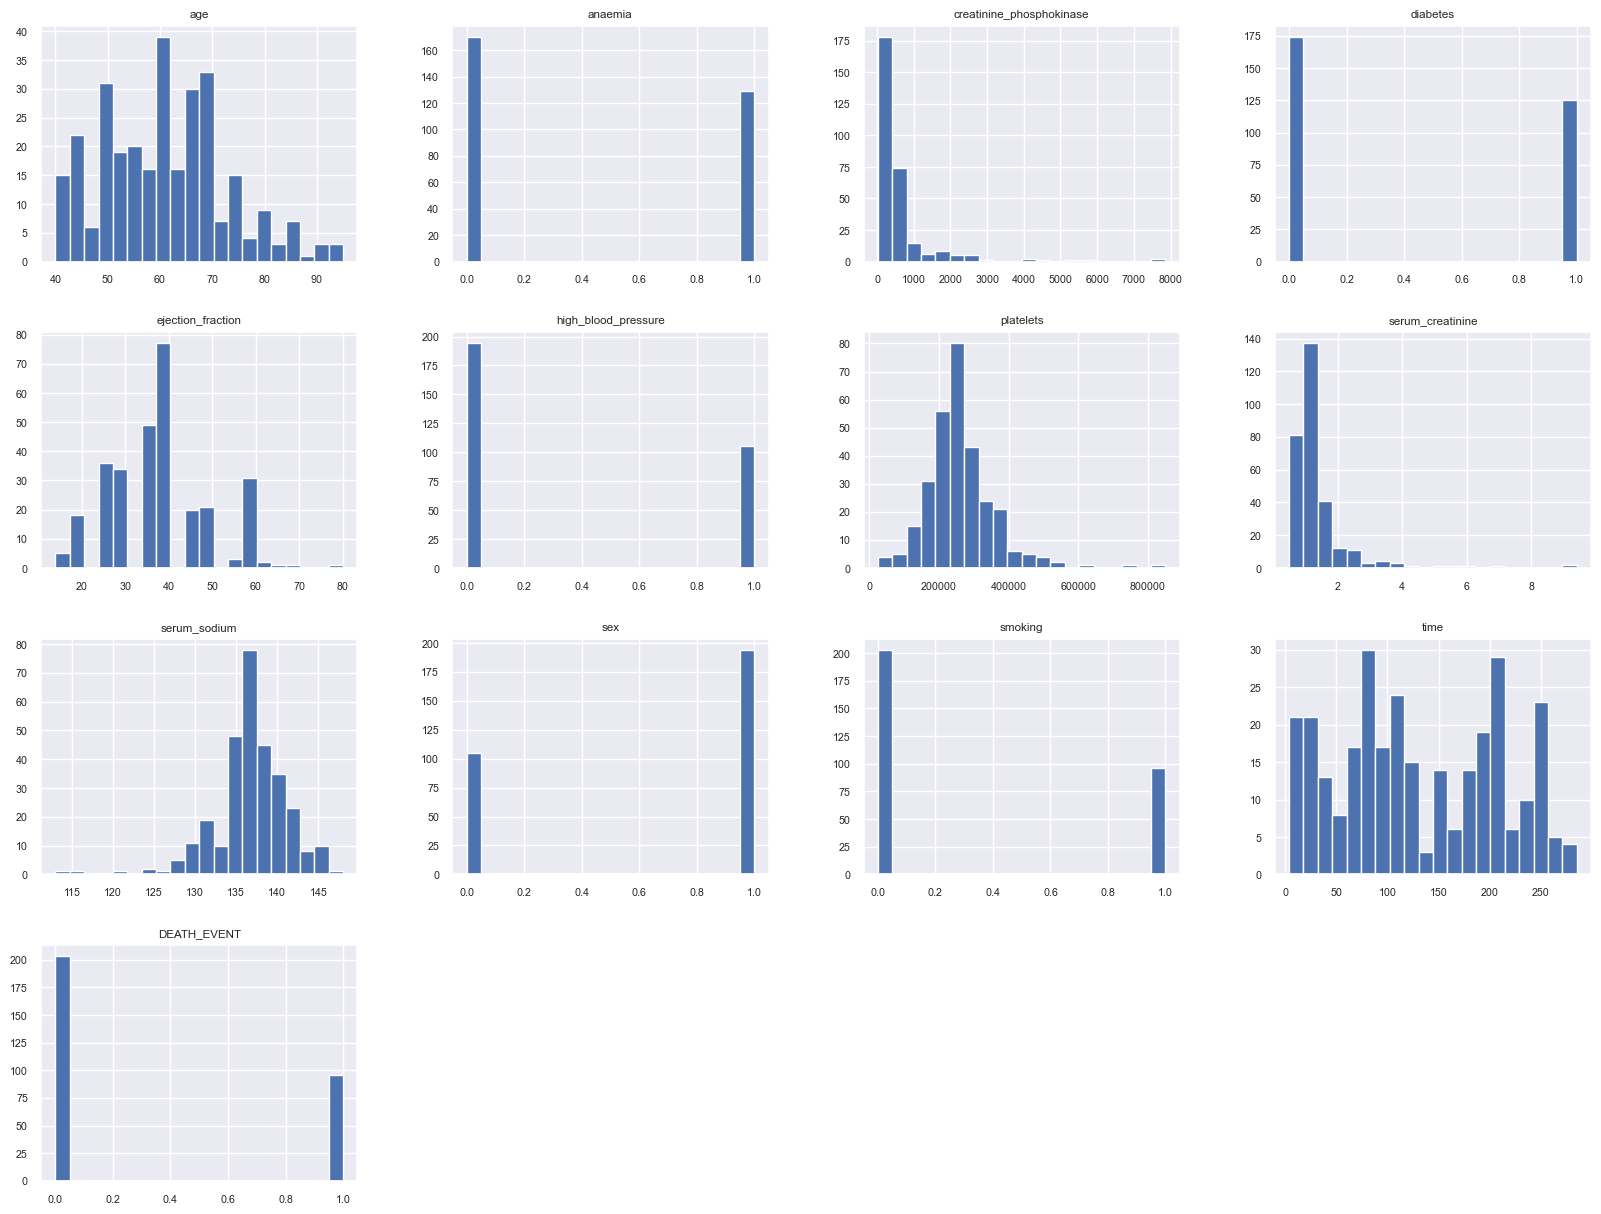

In [353]:
## calling the histogram method on the whole dataset
df.hist(bins=20, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Death Event plot')

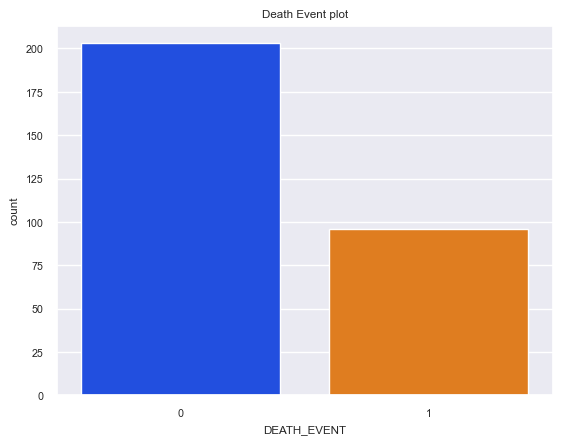

In [350]:
sns.countplot(x= df["DEATH_EVENT"], palette= 'bright')
plt.title('Death Event plot')


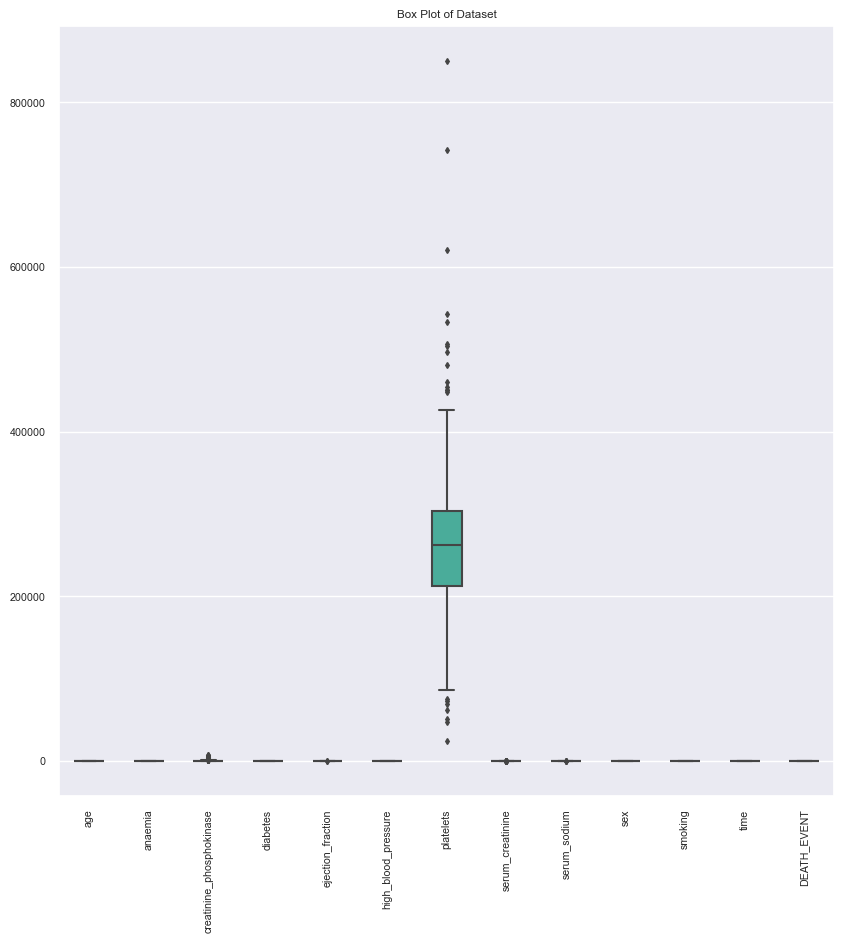

In [217]:
## calling Box plot for whole dataset
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)
plt.title('Box Plot of Dataset', loc="center")
plt.xticks(rotation=90)
plt.show()

In [218]:
df['platelets'].describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

In [306]:
## exploratory data analysis
## correlation matrix

corrmat = df.corr(numeric_only=True)
corrmat

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: >

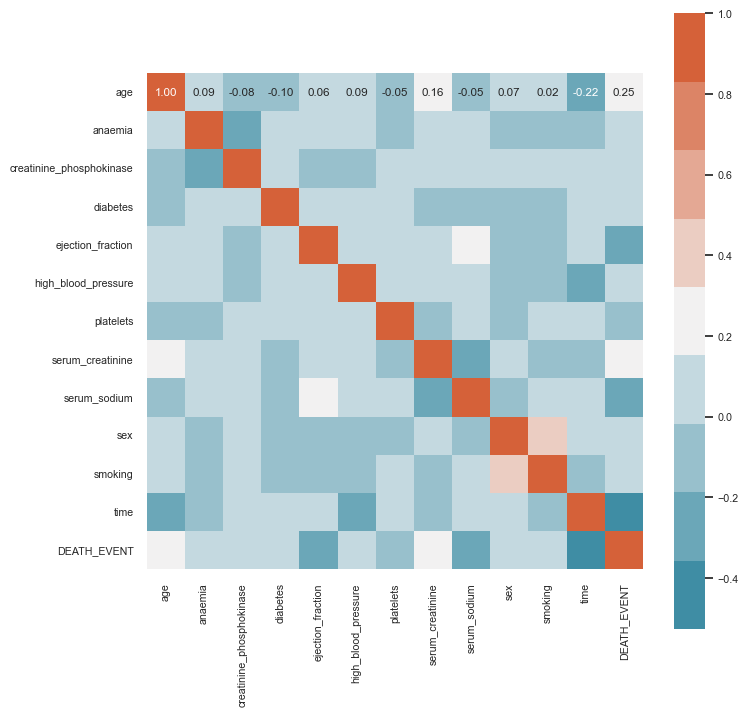

In [307]:
## Heatmap of corelation matrix
cmap = sns.diverging_palette(220, 22, s=80, l=55, n=9)
corrmat = df.corr()
plt.subplots(figsize=(8,8))
sns. set(font_scale=0.7)
sns.heatmap(corrmat,cmap= cmap,annot=True, fmt='.2f', square=True)

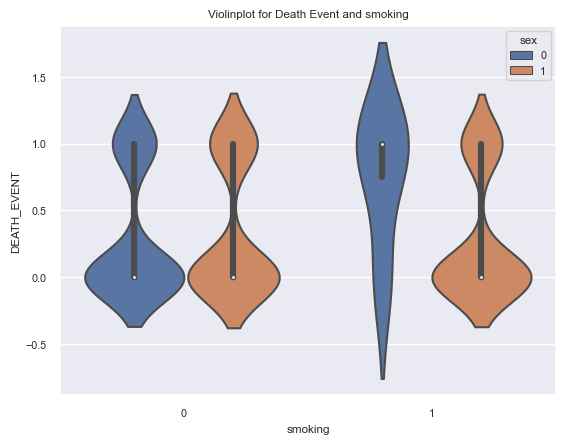

In [349]:
## violinplot for Death events
sns.violinplot(x='smoking', y='DEATH_EVENT', hue='sex', data=df)
plt.title('Violinplot for Death Event and smoking')
plt.show()

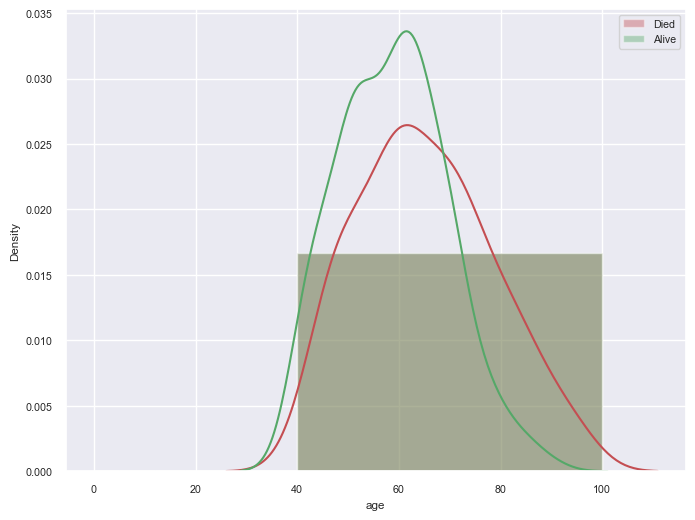

In [221]:
plt.figure(figsize=(8,6))
sns.distplot(df.age[df.DEATH_EVENT == 1], bins = [0, 5, 12, 18, 40, 100], kde=True,color="r", label="Died")

sns.distplot(df.age[df.DEATH_EVENT == 0], bins = [0, 5, 12, 18, 40, 100], kde=True,color="g", label="Alive")
plt.legend()

In [222]:
def plot_swarm_survivors(df, feature1, feature2, title, marker_size=5):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.grid(True)
    plt.xticks((0, 1))
    
    sns.swarmplot(y=feature1, x=feature2, hue='DEATH_EVENT', data=df, s=marker_size)
    ax.set_title(title)


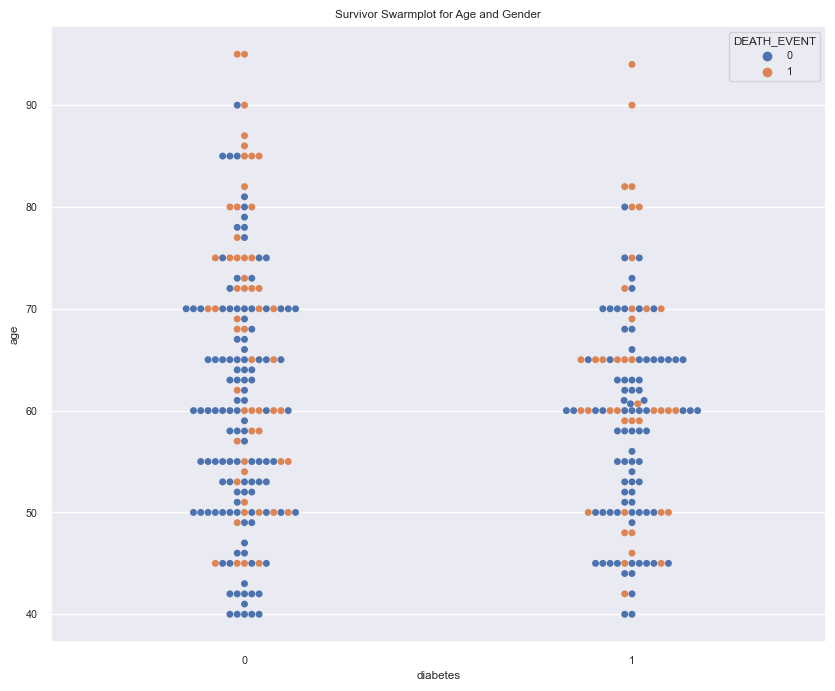

In [223]:
## analyse age and pclass
plot_swarm_survivors(df, 'age', "diabetes", "Survivor Swarmplot for Age and Gender")

In [224]:
## splitting the data into dependent and independent variable

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [225]:
## split the data into train test and split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [226]:
## standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [227]:
## Train the model NAIVE BAYES
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)

GaussianNB()

In [228]:
## predict NB
NB_pred = model_NB.predict(x_test)

In [229]:
## putting it in a dataframe

pd.DataFrame({'actual': y_test, 'Predicted': NB_pred})

,actual,Predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,1
7,0,0
8,0,0
9,0,0


In [286]:
## model evaluation
accuracy_NB = accuracy_score(y_test, NB_pred )

## confusion matrix
conf_mat_NB = confusion_matrix(y_test, NB_pred)


print(accuracy_NB)
print(conf_mat_NB)

0.75
[[35  6]
 [ 9 10]]


In [231]:
## classification report
print(classification_report(y_test, NB_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.62      0.53      0.57        19

    accuracy                           0.75        60
   macro avg       0.71      0.69      0.70        60
weighted avg       0.74      0.75      0.74        60



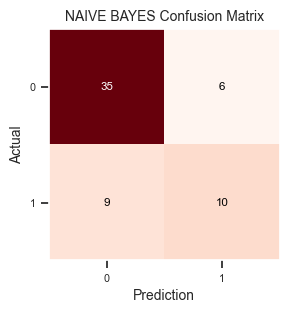

In [285]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_NB, figsize=(3,3), cmap=plt.cm.Reds)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('NAIVE BAYES Confusion Matrix', fontsize = 10)
plt.show()

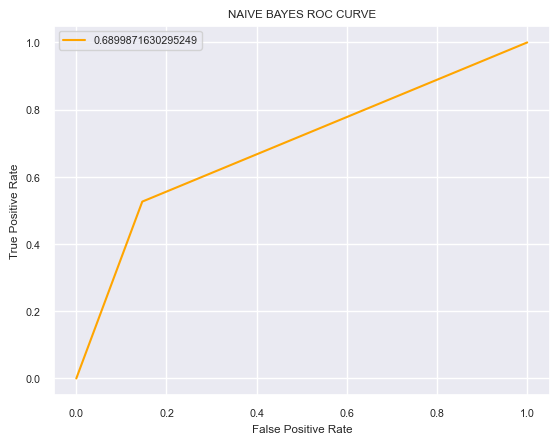

In [279]:
## ROC curve NAIVE BAYES
auc_NB = roc_auc_score(y_test, NB_pred)
fpr, tpr, _ = roc_curve(y_test, NB_pred)
plt.plot(fpr, tpr, color = 'orange', label = auc_NB)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NAIVE BAYES ROC CURVE')
plt.legend()
plt.show()

In [234]:
## train the model LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

LogisticRegression()

In [235]:
## make prediction
LR_pred = model_LR.predict(x_test)

In [236]:
## PUTTING THE ACTUAL AND PREDICTED IN A DATAFRAME
pd.DataFrame({'Actual': y_test, 'Predicted': LR_pred})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [237]:
## model evaluation
accuracy_LR = accuracy_score(y_test, LR_pred )

## confusion matrix
conf_mat_LR = confusion_matrix(y_test, LR_pred)


print(accuracy_LR)
print(conf_mat_LR)

0.85
[[37  4]
 [ 5 14]]


In [238]:
## classification report for LOGISTIC REGRESSION MODEL
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



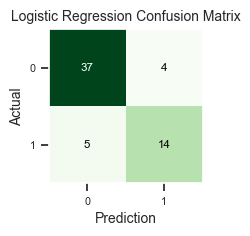

In [239]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_LR, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix', fontsize = 10)
plt.show()

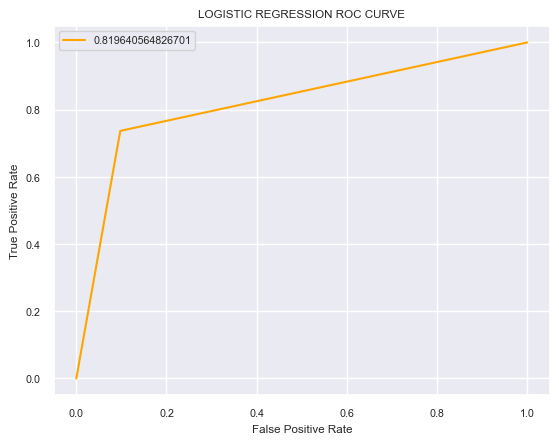

In [280]:
## ROC curve of LOGISTIC REGRESSION MODEL
auc_LR = roc_auc_score(y_test, LR_pred)
fpr, tpr, _ = roc_curve(y_test, LR_pred)
plt.plot(fpr, tpr, color = 'orange', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOGISTIC REGRESSION ROC CURVE')
plt.legend()
plt.show()

In [241]:
## support vector machine using classifier svc.
clfLinear = svm.SVC(kernel='linear')
clfSigmoid = svm.SVC(kernel='sigmoid')
clfrbf = svm.SVC(kernel='rbf')

In [242]:
## fit the SVC model
clfLinear.fit(x_train, y_train)
clfSigmoid.fit(x_train, y_train)
clfrbf.fit(x_train, y_train)

SVC()

In [243]:
## make prediction
y_pred_linear = clfLinear.predict(x_test)
y_pred_sigmoid = clfSigmoid.predict(x_test)
y_pred_rbf = clfrbf.predict(x_test)

In [244]:
## model evaluation
print('Accuracy(Linear):', metrics.accuracy_score(y_test, y_pred_linear))
print('Accuracy(Sigmoid):', metrics.accuracy_score(y_test, y_pred_sigmoid))
print('Accuracy(RBF):', metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy(Linear): 0.8333333333333334
Accuracy(Sigmoid): 0.8
Accuracy(RBF): 0.75


In [342]:
## classification report
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.71      0.63      0.67        19

    accuracy                           0.80        60
   macro avg       0.77      0.75      0.76        60
weighted avg       0.80      0.80      0.80        60



In [348]:
## model evaluation
accuracy_svm = accuracy_score(y_test, y_pred_sigmoid)

## confusion matrix
conf_mat_svm = confusion_matrix(y_test, y_pred_sigmoid)


print(accuracy_svm)
print(conf_mat_svm)

0.8
[[36  5]
 [ 7 12]]


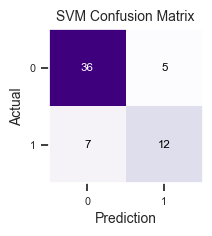

In [345]:
## confusion matrix plot OF SVM

fig, ax = plot_confusion_matrix(conf_mat_svm, figsize=(2,2), cmap=plt.cm.Purples)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('SVM Confusion Matrix', fontsize = 10)
plt.show()

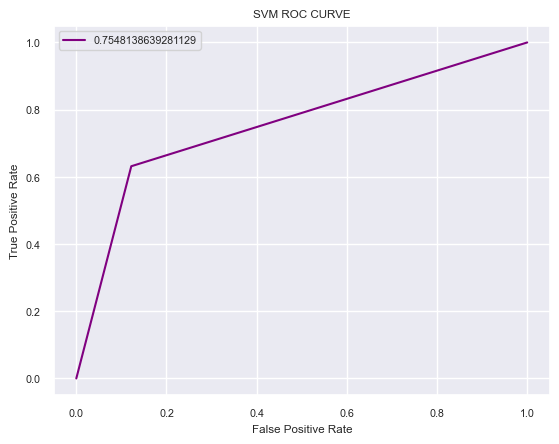

In [347]:
## ROC curve SUPPORT VECTOR MACHINES
auc_svm = roc_auc_score(y_test, y_pred_sigmoid)
fpr, tpr, _ = roc_curve(y_test, y_pred_sigmoid)
plt.plot(fpr, tpr, color = 'PURPLE', label = auc_svm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC CURVE')
plt.legend()
plt.show()

In [287]:
## initialize the neural network
model = Sequential()

## input layers
model.add(Dense(units=16, kernel_initializer='uniform', activation = 'relu', input_dim = 12))

## hidden layer
#model.add(Dense(units=8, kernel_initializer='uniform', activation = 'relu'))

## regularization
#model.add(Dropout(0.25))

## output layer
model.add(Dense(units= 1, kernel_initializer='uniform', activation = 'sigmoid'))

In [288]:
## compile the network
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics =['accuracy'] )

In [289]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                208       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [290]:
## train the network ARTIFICIAL NEURAL NETWORK

history = model.fit(x_train, y_train, batch_size= 10, epochs= 20, validation_split= 0.25)

Epoch 1/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.6034 - val_loss: 0.6860 - val_accuracy: 0.8333
Epoch 2/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.7039 - val_loss: 0.6769 - val_accuracy: 0.7667
Epoch 3/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.7263 - val_loss: 0.6655 - val_accuracy: 0.8000
Epoch 4/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.7598 - val_loss: 0.6507 - val_accuracy: 0.8333
Epoch 5/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.7709 - val_loss: 0.6311 - val_accuracy: 0.8667
Epoch 6/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.7877 - val_loss: 0.6097 - val_accuracy: 0.8500
Epoch 7/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6115 - accuracy: 0.8101 - val_loss: 0.5836 - val_accuracy: 0.8667
Epoch 8/20
18/18 [==

In [291]:
## save my model
model.save('anna_model')

INFO:tensorflow:Assets written to: anna_model/assets


INFO:tensorflow:Assets written to: anna_model/assets


In [292]:
## load saved ANN model
ann_model = tf.keras.models.load_model('anna_model')

In [293]:
## make predictions on test data
y_pred_ann = ann_model.predict(x_test)
y_pred_ann

2/2 [==============================] - 0s 1ms/step


array([[0.16163003],
       [0.09993744],
       [0.07349419],
       [0.6042118 ],
       [0.39057928],
       [0.10099265],
       [0.4556885 ],
       [0.01797742],
       [0.17775807],
       [0.23587653],
       [0.14970568],
       [0.5261034 ],
       [0.62678784],
       [0.83369946],
       [0.28235355],
       [0.1963912 ],
       [0.36961016],
       [0.19877562],
       [0.30307987],
       [0.22730199],
       [0.56474763],
       [0.57177883],
       [0.22562145],
       [0.13669305],
       [0.5378445 ],
       [0.15776938],
       [0.11744016],
       [0.6695261 ],
       [0.40345117],
       [0.2642247 ],
       [0.62913656],
       [0.11268127],
       [0.83062524],
       [0.21656628],
       [0.77475625],
       [0.14082316],
       [0.08921393],
       [0.13105889],
       [0.07840473],
       [0.82507926],
       [0.7290688 ],
       [0.6279442 ],
       [0.1972972 ],
       [0.16888827],
       [0.7493153 ],
       [0.13930656],
       [0.7532184 ],
       [0.865

In [294]:
## set a threshold
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

In [295]:
y_pred_ann.shape

(60, 1)

In [296]:
y_test.shape

(60,)

In [298]:
## flatten
y_pred_ann = y_pred_ann.flatten()
y_pred_ann.shape

(60,)

In [299]:
## put in Dataframe
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [300]:
## classification report ANN
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.70      0.74      0.72        19

    accuracy                           0.82        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.82      0.82      0.82        60



In [301]:
## confusion Matrix ANN

conf_mat_ann = confusion_matrix(y_test, y_pred_ann)

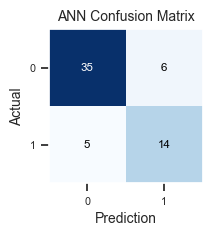

In [302]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_ann, figsize=(2,2), cmap=plt.cm.Blues)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('ANN Confusion Matrix', fontsize = 10)
plt.show()

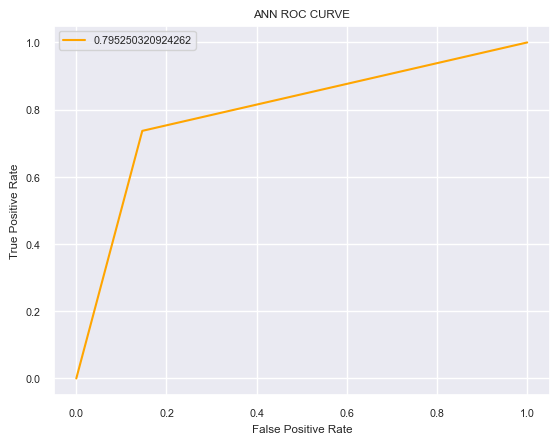

In [303]:
## ROC curve OF ANN
auc_ann = roc_auc_score(y_test, y_pred_ann)
fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color = 'orange', label = auc_ann)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC CURVE')
plt.legend()
plt.show()

In [333]:
## Random Forest model

## splitting our data
## 80% for training, 20% for testing

x = df.iloc[:, 0:13]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [334]:
y_pred_rf = rf.predict(x_test)

In [335]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [336]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

,Actual,Predicted
109,0,0
264,0,0
285,0,0
19,1,1
123,0,0
242,0,0
103,0,0
296,0,0
204,0,0
115,0,0


In [337]:
## classification report of Random Forest Model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        19

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [338]:
## confusion Matrix Random Forest

com_rf = confusion_matrix(y_test, y_pred_rf)

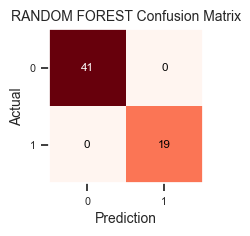

In [339]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(com_rf, figsize=(2,2), cmap=plt.cm.Reds)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('RANDOM FOREST Confusion Matrix', fontsize = 10)
plt.show()

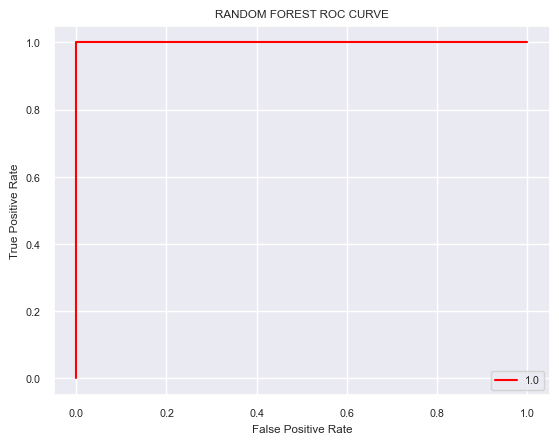

In [341]:
## ROC curve OF RANDOM FOREST MODEL
auc_rf = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr, color = 'red', label = auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RANDOM FOREST ROC CURVE')
plt.legend()
plt.show()